# Programing Assignment III: Quantum Computing Primitives

In [5]:
from numpy import pi as pi
from qiskit import *
from my_quantum_circuit import MyQuantumCircuit

In [6]:
IBMQ_API_TOKEN: str = '2ebc90b4f6a0a95f7af6e953a4481652c258639d9a23ff2e3531024fd977e39910b05cfb58d76ead4ef7f662177156753f13c265522a70a8fb208d3a11913039'
IBMQ.save_account(IBMQ_API_TOKEN)
IBMQ.load_account()
pass

configrc.store_credentials:WARNING:2023-10-30 14:38:56,933: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-10-30 14:38:57,449: Credentials are already in use. The existing account in the session will be replaced.


## Exercise I -  Programming Quantum Arithmetics with Qiskit - Increment and Decrement

Quantum computing allows for completing traditional arithmetic operations exploiting the superposition of states, e.g., we can increment or decrement in parallel quantum states in superposition. Because of the non-cloning theorem, we can't perform assignments, but only quantum state updates, like increment and decrement.

This exercise aims to implement 3-qubit increment and decrement operators, =+ -=, using the IBM Qiskit framework and its Aer quantum computer simulator.

As part of the exercise:
1. Prepare a superposition of quantum states using HAD QPU instructions. You can decide freely which superposition. This will determine the concurrent increment ordecrement operator.
2. Plot the quantum states using the circle notation. IBM Qiskit does not support visualization for this step, you will need to implement a Python routine to visualize the quantum states of our qubit. You can find a Python code to perform this task at 1.1.1 - Python Code for Circle Notation. You also need to check the Qiskit function to retrieve the complex number corresponding to a quantum state of our qubit system so you can then plot it.
3. Perform an increment operation (by 1) +=
4. Plot the quantum states using the circular notation
5. Perform a decrement operation (by 1) -=
6. Plot the quantum states using the circular notation

Answer the following questions:
1. What happens if we have an overflow (for the increment) or underflow (for the decrement)? Show the results of the overflow and underflow with an experiment.
2. Does increment and decrement operation work also with negative integer numbers? Motivate with an example.

In [7]:
class IncDecQuantumCircuit(MyQuantumCircuit):

    def increment_qreg(self, qreg_index: int):
        qreg = self.circuit.qregs[qreg_index]
        self.circuit.ccx(qreg[0], qreg[1], qreg[2])
        self.circuit.cx(qreg[0], qreg[1])
        self.circuit.x(qreg[0])
        return self


    def decrement_qreg(self, qreg_index: int):
        qreg = self.circuit.qregs[qreg_index]
        self.circuit.x(qreg[0])
        self.circuit.cx(qreg[0], qreg[1])
        self.circuit.ccx(qreg[0], qreg[1], qreg[2])
        return self


class QFTQuantumCircuit(MyQuantumCircuit):

    def qiskit_qft(self, qreg_index):
        pass
        return self

    def quantum_fourier_transform_qreg(self, qreg_index: int):
        circuit = self.circuit
        qreg = circuit.qregs[qreg_index]
        qreg_size = int(qreg.size)

        # Apply HADs and CPHASEs:
        for qft_block in range(qreg_size - 1, -1, -1):
            circuit.h(qreg[qft_block])
            for j in range(qft_block - 1, -1, -1):
                theta = - pi / 2 ** (qft_block - j)  # Beware: rotation angle theta must be negative!

                circuit.cp(theta=theta, control_qubit=qreg[j], target_qubit=qreg[qft_block])
            circuit.barrier()

        # Apply SWAPs:
        for k in range(qreg_size // 2):
            circuit.swap(qreg[k], qreg[qreg_size - k - 1])

        return self

    def inverse_quantum_fourier_transform_qreg(self, qreg_index: int):
        circuit = self.circuit
        qreg = circuit.qregs[qreg_index]
        qreg_size = int(qreg.size)
        # Apply SWAPs:
        for k in range(qreg_size // 2):
            circuit.swap(qreg[k], qreg[qreg_size - k - 1])

        # Apply HADs and CPHASEs:
        for qft_block in range(qreg_size):
            circuit.barrier()
            circuit.h(qreg[qft_block])
            for j in range(qft_block + 1, qreg_size):
                theta = pi / 2 ** (j - qft_block)
                circuit.cp(theta=theta, target_qubit=qreg[j], control_qubit=qreg[qft_block])

        return self

    def generate_signals(self, qreg_index: int, qubit_index_theta_dict: dict[int, float]):
        qreg = self.circuit.qregs[qreg_index]
        for qubit_index in qubit_index_theta_dict:
            phase = qubit_index_theta_dict[qubit_index]
            self.circuit.p(theta=phase, qubit=qreg[qubit_index])
        return self

      ┌──────────────────────────────┐┌───┐ pre_inc           ┌───┐ post_inc »
q1_0: ┤0                             ├┤ H ├────░──────■────■──┤ X ├────░─────»
      │                              │└───┘    ░      │  ┌─┴─┐└───┘    ░     »
q1_1: ┤1 Initialize(0,0,0,0,0,0,1,0) ├─────────░──────■──┤ X ├─────────░─────»
      │                              │         ░    ┌─┴─┐└───┘         ░     »
q1_2: ┤2                             ├─────────░────┤ X ├──────────────░─────»
      └──────────────────────────────┘         ░    └───┘              ░     »
c1: 3/═══════════════════════════════════════════════════════════════════════»
                                                                             »
«      ┌─┐      
«q1_0: ┤M├──────
«      └╥┘┌─┐   
«q1_1: ─╫─┤M├───
«       ║ └╥┘┌─┐
«q1_2: ─╫──╫─┤M├
«       ║  ║ └╥┘
«c1: 3/═╩══╩══╩═
«       0  1  2 
Statevector "pre_inc": 


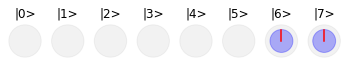

Statevector "post_inc": 


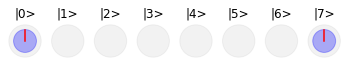

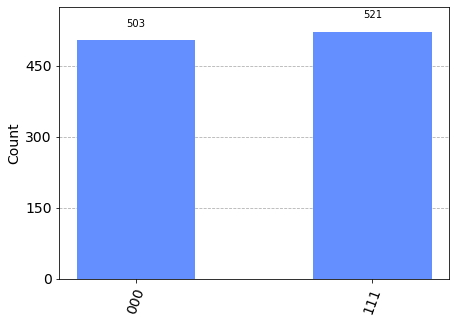

In [8]:
# Increment operation on a 3-qubit register:
N_QUBITS = 3
INITIAL_VALUE = 6
HAD_GATE_INDICES = [0]

IncDecQuantumCircuit()\
    .create_simple_circuit(n_qubits=N_QUBITS, name='Increment Circuit')\
    .prepare_qreg_step(qreg_index=0,init_val=INITIAL_VALUE,had_gate_indices=HAD_GATE_INDICES)\
    .save_statevector(statevector_label='pre_inc')\
    .increment_qreg(qreg_index=0)\
    .save_statevector(statevector_label='post_inc')\
    .measure_qreg_to_creg(qreg_index=0, creg_index=0)\
    .draw_circuit()\
    .execute_circuit()\
    .plot_statevector(statevector_label='pre_inc')\
    .plot_statevector(statevector_label='post_inc')\
    .plot_results()[1]

      ┌───┐ pre_inc ┌───┐           post_inc ┌─┐      
q9_0: ┤ H ├────░────┤ X ├──■────■──────░─────┤M├──────
      └───┘    ░    └───┘┌─┴─┐  │      ░     └╥┘┌─┐   
q9_1: ─────────░─────────┤ X ├──■──────░──────╫─┤M├───
               ░         └───┘┌─┴─┐    ░      ║ └╥┘┌─┐
q9_2: ─────────░──────────────┤ X ├────░──────╫──╫─┤M├
               ░              └───┘    ░      ║  ║ └╥┘
c2: 3/════════════════════════════════════════╩══╩══╩═
                                              0  1  2 
Statevector "pre_inc": 


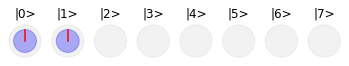

Statevector "post_inc": 


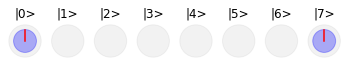

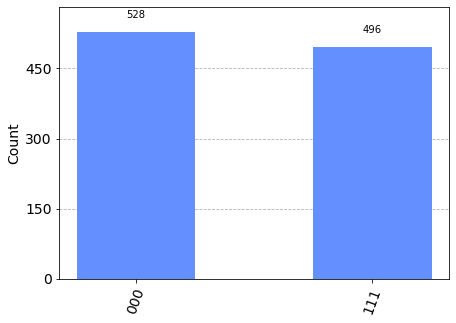

In [9]:
# Decrement operation on a 3-qubit register:
N_QUBITS = 3
INITIAL_VALUE = None
HAD_GATE_INDICES = [0]

IncDecQuantumCircuit()\
    .create_simple_circuit(n_qubits=N_QUBITS,name='Decrement Circuit')\
    .prepare_qreg_step(qreg_index=0,init_val=INITIAL_VALUE,had_gate_indices=HAD_GATE_INDICES)\
    .save_statevector(statevector_label='pre_inc')\
    .decrement_qreg(qreg_index=0)\
    .save_statevector(statevector_label='post_inc')\
    .measure_qreg_to_creg(qreg_index=0,creg_index=0)\
    .draw_circuit()\
    .execute_circuit()\
    .plot_statevector(statevector_label='pre_inc')\
    .plot_statevector(statevector_label='post_inc')\
    .plot_results()[1]

## Exercise II -  Programming the Quantum Fourier Transform (QFT) with Qiskit

The quantum Fourier transform is a crucial building block of many quantum algorithms, from Shor’s factoring algorithm to quantum phase estimation and simulations. As we saw in the lectures, QFT, like the conventional DFT and FFT, can be used to transform a function from the time domain into the frequency domain. Information about the periodic behavior of a function can be, for instance, encoded in the phases of the quantum states.

The goal of this exercise is to compute a 3-qubit QFT of \[0, 1, 0, 0, 0, 0, 0, 0\] using IBM Qiskit and execute it on the Qiskit Aer quantum computer simulator.  As part of this task, develop a three-qubit QFT from scratch using Qiskit, following the circuit formulation in the lecture. Note that the IBM Qiskit provide a QFT function without the need to implement it from scratch. However, the Qiskit QFT code has a different ordering, as explained in the textbook, as pointed out in this GitHub issue: https://github.com/Qiskit/qiskit/pull/4849.

As part of the exercise:
1. Prepare the input \[0, 1, 0, 0, 0, 0, 0, 0\].
2. Plot the quantum states using the circle notation
3. Perform the QFT
4. Plot the quantum states using the circle notation

       ┌───┐┌────────┐ pre_qft                                     ░      »
q16_0: ┤ H ├┤ P(π/4) ├────░──────────────────────────────■─────────░──────»
       ├───┤├────────┤    ░                              │         ░      »
q16_1: ┤ H ├┤ P(π/2) ├────░────────────────────■─────────┼─────────░──────»
       ├───┤└┬──────┬┘    ░                    │         │         ░ ┌───┐»
q16_2: ┤ H ├─┤ P(π) ├─────░──────────■─────────┼─────────┼─────────░─┤ H ├»
       ├───┤ └──────┘     ░    ┌───┐ │P(-π/2)  │P(-π/4)  │P(-π/8)  ░ └───┘»
q16_3: ┤ H ├──────────────░────┤ H ├─■─────────■─────────■─────────░──────»
       └───┘              ░    └───┘                               ░      »
 c3: 4/═══════════════════════════════════════════════════════════════════»
                                                                          »
«                            ░                 ░ ┌───┐ ░        post_qft ┌─┐   »
«q16_0: ───────────■─────────░───────■─────────░─┤ H ├─░──X────────░─────┤M├───»
« 

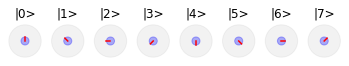

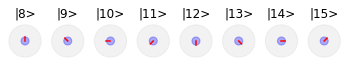

Statevector "post_qft": 


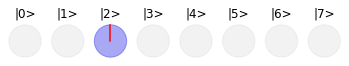

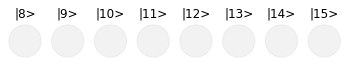

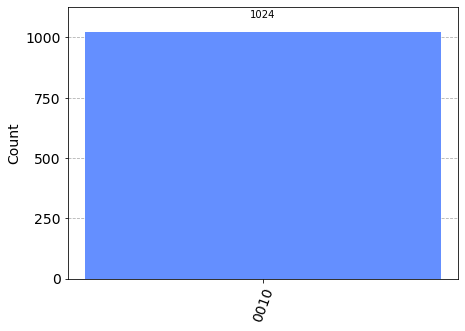

In [10]:
# QFT applied on some example:
INITIAL_VALUE = None
HAD_GATE_INDICES = [0, 1, 2, 3]

THETAS = {
    0: pi/4,
    1: pi/2,
    2: pi,
}

QFTQuantumCircuit()\
    .create_simple_circuit(4)\
    .prepare_qreg_step(qreg_index=0,init_val=INITIAL_VALUE,had_gate_indices=HAD_GATE_INDICES)\
    .generate_signals(qreg_index=0, qubit_index_theta_dict=THETAS)\
    .save_statevector(statevector_label='pre_qft')\
    .quantum_fourier_transform_qreg(qreg_index=0)\
    .save_statevector(statevector_label='post_qft')\
    .measure_qreg_to_creg(qreg_index=0, creg_index=0)\
    .draw_circuit()\
    .execute_circuit()\
    .plot_statevector(statevector_label='pre_qft')\
    .plot_statevector(statevector_label='post_qft')\
    .plot_results()[1]

# Applying QFT 1 time yields 2.
# Applying QFT 2 times yields a similar signal pattern but phase rotations occur in the opposite direction.
# Applying QFT 3 times yields 14 = 16 - 2.
# Applying QFT 4 times yields the initial signals.

       ┌──────────────────────────────────────────────┐ pre_qft        ░ ┌───┐»
q24_0: ┤0                                             ├────░─────X─────░─┤ H ├»
       │                                              │    ░     │     ░ └───┘»
q24_1: ┤1                                             ├────░─────┼──X──░──────»
       │  Initialize(0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0) │    ░     │  │  ░      »
q24_2: ┤2                                             ├────░─────┼──X──░──────»
       │                                              │    ░     │     ░      »
q24_3: ┤3                                             ├────░─────X─────░──────»
       └──────────────────────────────────────────────┘    ░           ░      »
 c4: 4/═══════════════════════════════════════════════════════════════════════»
                                                                              »
«                                   ░                         ░               »
«q24_0: ─■────────■────────■────────░───

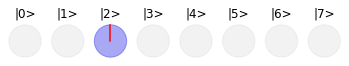

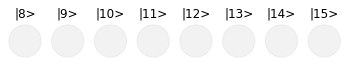

Statevector "post_qft": 


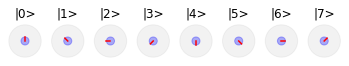

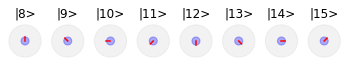

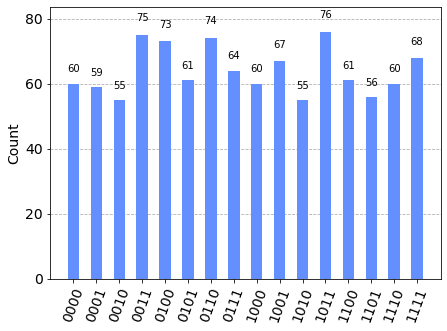

In [11]:
# invQFT applied on some example:
INITIAL_VALUE = 2
HAD_GATE_INDICES = None

QFTQuantumCircuit()\
    .create_simple_circuit(4)\
    .prepare_qreg_step(qreg_index=0,init_val=INITIAL_VALUE,had_gate_indices=HAD_GATE_INDICES)\
    .save_statevector(statevector_label='pre_qft')\
    .inverse_quantum_fourier_transform_qreg(qreg_index=0)\
    .save_statevector(statevector_label='post_qft')\
    .measure_qreg_to_creg(qreg_index=0, creg_index=0)\
    .draw_circuit()\
    .execute_circuit()\
    .plot_statevector(statevector_label='pre_qft')\
    .plot_statevector(statevector_label='post_qft')\
    .plot_results()[1]

       ┌──────────────────────────────────────────────┐ pre_qft                »
q32_0: ┤0                                             ├────░───────────────────»
       │                                              │    ░                   »
q32_1: ┤1                                             ├────░───────────────────»
       │  Initialize(0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0) │    ░                   »
q32_2: ┤2                                             ├────░──────────■────────»
       │                                              │    ░    ┌───┐ │P(-π/2) »
q32_3: ┤3                                             ├────░────┤ H ├─■────────»
       └──────────────────────────────────────────────┘    ░    └───┘          »
 c5: 4/════════════════════════════════════════════════════════════════════════»
                                                                               »
«                            ░                           ░                 ░ »
«q32_0: ───────────■─────────░

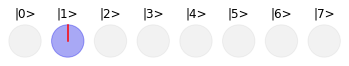

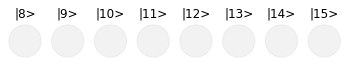

Statevector "post_qft": 


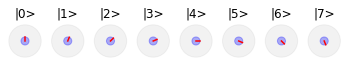

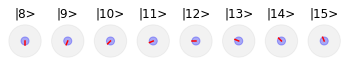

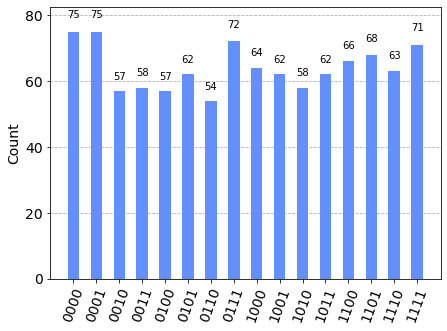

In [12]:
# Qiskit QFT: - TO BE IMPLEMENTED TOMORROW, 30 Oct 2023
INITIAL_VALUE = 1
HAD_GATE_INDICES = None

QFTQuantumCircuit()\
    .create_simple_circuit(4)\
    .prepare_qreg_step(qreg_index=0,init_val=INITIAL_VALUE,had_gate_indices=HAD_GATE_INDICES)\
    .save_statevector(statevector_label='pre_qft')\
    .quantum_fourier_transform_qreg(qreg_index=0)\
    .save_statevector(statevector_label='post_qft')\
    .measure_qreg_to_creg(qreg_index=0, creg_index=0)\
    .draw_circuit()\
    .execute_circuit()\
    .plot_statevector(statevector_label='pre_qft')\
    .plot_statevector(statevector_label='post_qft')\
    .plot_results()[1]

## Assignment Report

In your report, please provide:
1. Briefly describe the quantum circuit design, including the gates used and their sequence.
2. Code implementation of the quantum circuit using Qiskit.
3. Simulation results
4. Brief discussion of the results.